## 모델 평가

In [1]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 최적 parameter 찾기
from sklearn.model_selection import RandomizedSearchCV

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#### 데이터 불러오기

In [2]:
Car_raw = pd.read_csv("/home/piai/강의 실습/BigData/06. 팀 실습/02. 종합실습1/02. 실습파일/Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


#### 데이터 처리
각 차이가 적은 Model은 Drop  
대신 Brand 및 Location은 그대로 유지하여 Dummy

In [3]:
Car_raw.drop(columns=['Model', 'Name'], inplace=True)

In [4]:
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0,6,0,0,...,0,0,0,0,0,0,0,0,0,1
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0,4,0,1,...,0,0,0,0,0,0,0,0,0,1
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 데이터셋 분리

In [5]:
# 데이터셋 분리
# train/test data 분리
# X와 Y를 나누기 (예: 목표 변수 컬럼이 "Y"인 경우)
X = Car_raw_dummy.drop("Price", axis=1) # 설명 변수
Y = Car_raw_dummy["Price"] # 목표 변수

# train_test_split을 통해 훈련/테스트 세트 나누기
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, Y, test_size=0.3, random_state=1234)

# 훈련 및 테스트 세트 인덱스 리셋
df_train_x = df_train_x.reset_index(drop=True)
df_test_x = df_test_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_test_y = df_test_y.reset_index(drop=True)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [6]:
# 변수명 저장
v_feature_name = df_train_x.columns

#### 모델 생성

In [7]:
# 각 모델 생성
# Decision Tree
dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=11, 
                                 min_samples_leaf=7, min_samples_split=23, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2, 
                                 n_estimators=329, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06, 
                                     max_depth=16, max_features='sqrt', 
                                     min_samples_leaf=15, min_samples_split=5, 
                                     n_estimators=435, random_state=1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435, random_state=1234)

#### 모델 평가

In [9]:
# 모델 리스트 및 그래프를 그리기 생성 목적
models = ["의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팅 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

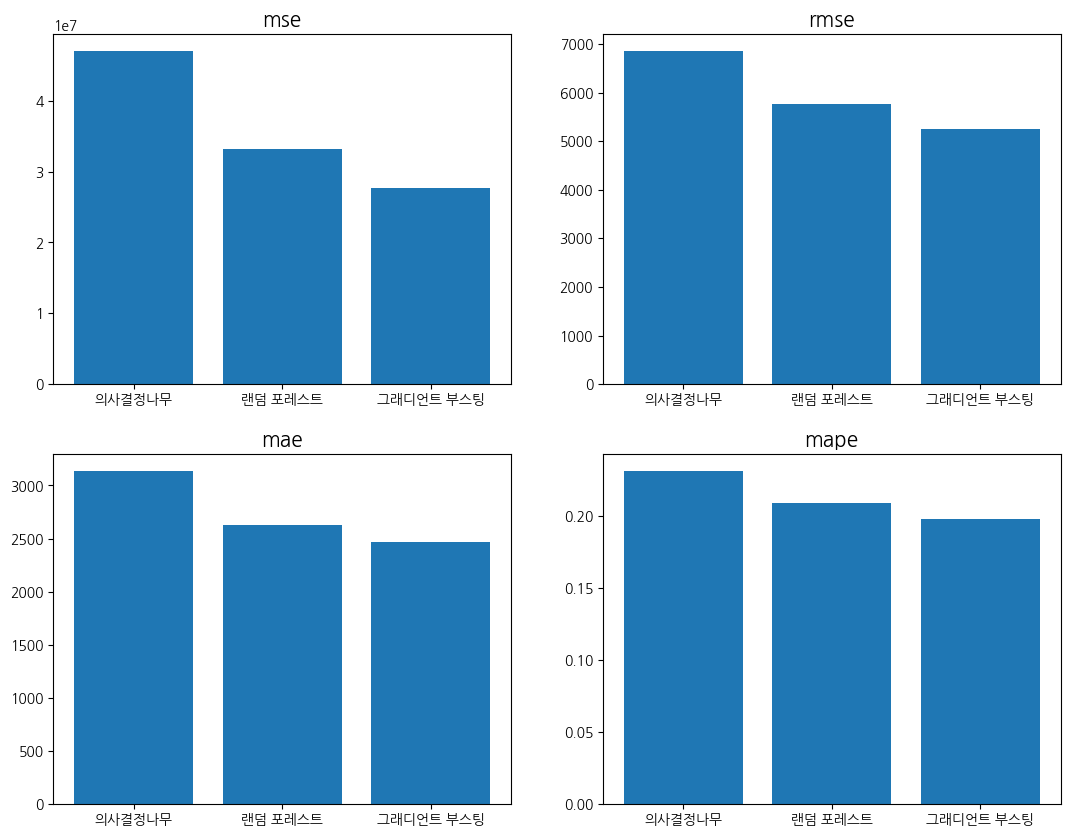

In [10]:
# 시각화
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

회귀 모델의 평가 기준은 MSE, RMSE, MAE, MAPE 4가지이며 값이 낮을 수록 좋은 모델이다.  
이 4가지 기준을 통해 Gradient Boosting > Random Forest > Decesion Tree 순으로 성능이 차이가 난다는 것을 확인할 수 있다.  
그러므로 중고차 가격 예측 모델 개발을 위해서는 그래디언트 부스팅 모델이 가장 적합하다고 판단할 수 있다.